# 二値画像処理

In [ ]:
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/cal.jpeg
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/ueno.jpeg
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/birthday.jpeg
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/cst.png
!wget https://upload.wikimedia.org/wikipedia/commons/3/31/Fingerprint_%28PSF%29.png
!pip install japanize-matplotlib

--2021-06-26 04:54:29--  https://github.com/eiichiromomma/CVMLAB/raw/master/img/cal.jpeg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/cal.jpeg [following]
--2021-06-26 04:54:29--  https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/cal.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40778 (40K) [image/jpeg]
Saving to: ‘cal.jpeg’

cal.jpeg            100%[===================>]  39.82K  --.-KB/s    in 0.002s  

2021-06-26 04:54:29 (15.7 MB/s) - ‘cal.jpeg’ saved [40778/40778]

--2021-06-26 04:54:29--  https://github.com/eiichiromomma/CVMLAB/

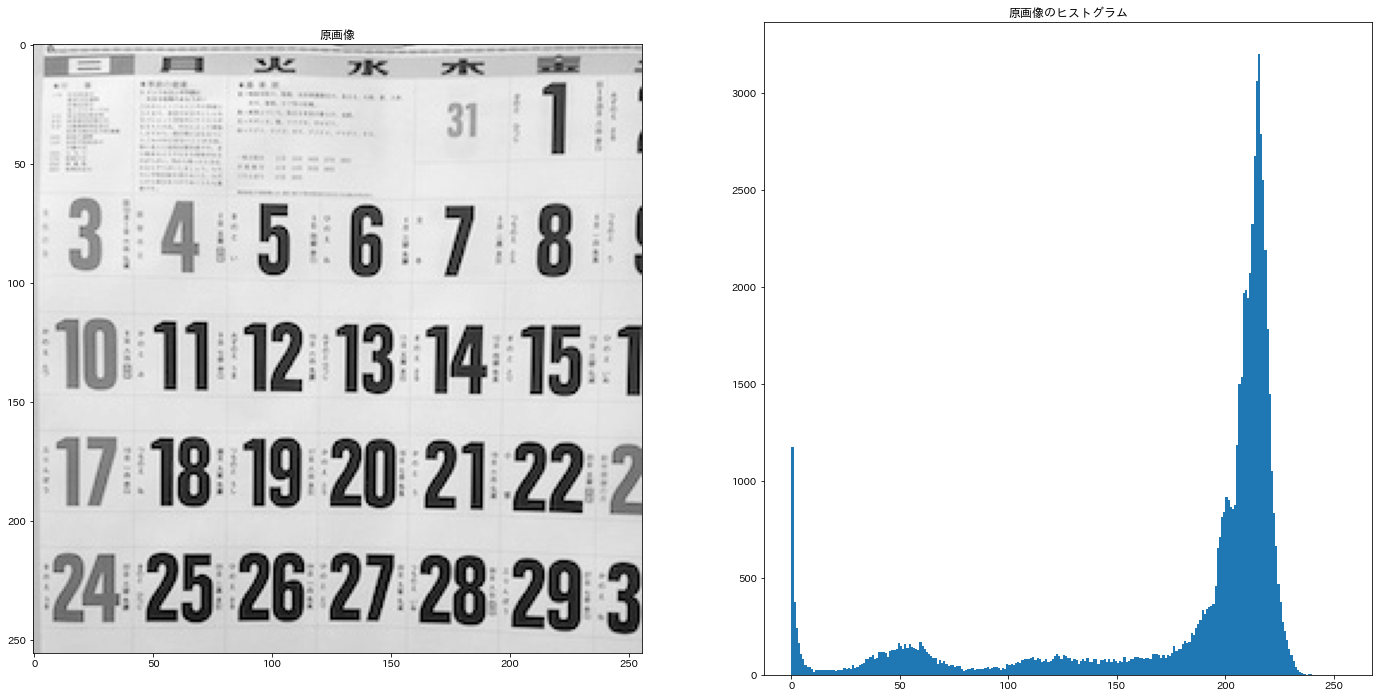

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rc('figure', figsize=[24,12])
gimg = cv2.imread('cal.jpeg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(gimg, cmap='gray')
plt.title('原画像')
plt.subplot(1,2,2)
h = plt.hist(gimg.ravel(), bins=255, range=(0, 255))
plt.title('原画像のヒストグラム');


# しきい値処理
Python(numpy)での閾値処理は容易でarrayに対して比較演算子を使うとTrue or Falseのarrayが返るので，それをindexとしてarrayに与えて値を代入する。

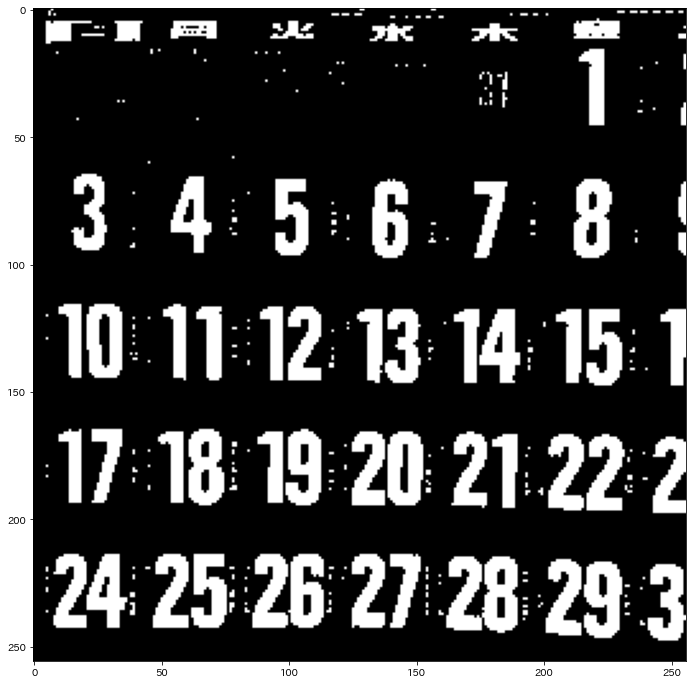

In [ ]:
dst = np.zeros(gimg.shape, dtype=np.uint8)
dst[gimg < 150] = 255
plt.imshow(dst, cmap='gray')

# 大津の法
大津の法が常にいい結果になるとは限らない
OpenCVの場合cv2.THRESH_OTSUをthreshold関数に指定すれば良い。ここでは反転させるためにTHRESH_BINARY_INVも加えている。

大津の法による閾値は131.0


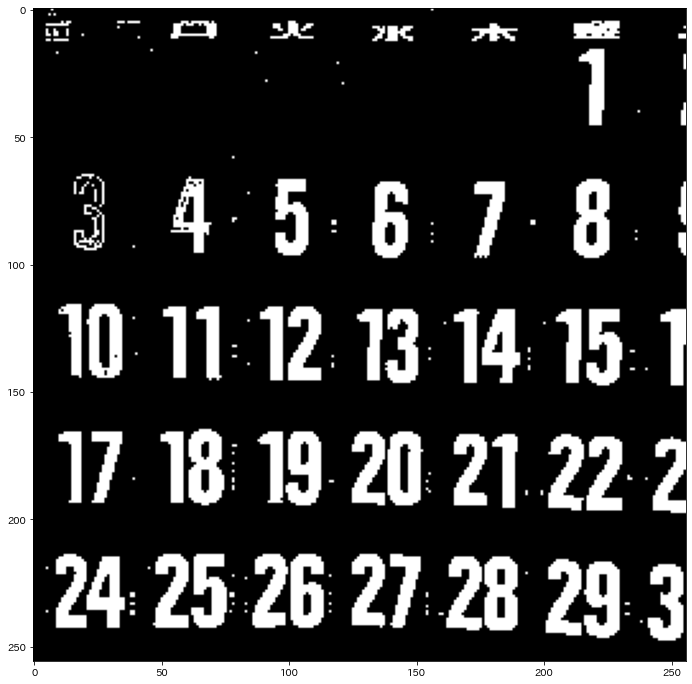

In [ ]:
ret, bimg = cv2.threshold(gimg, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
print(f'大津の法による閾値は{ret}')
plt.imshow(bimg, cmap='gray')

# Adaptiveな閾値処理
画像全体から閾値を決める2値化処理は局所的な照明に極めて弱い。照明に偏りがある場合にはブロックごとに閾値を決定していく方法が適当と言える。

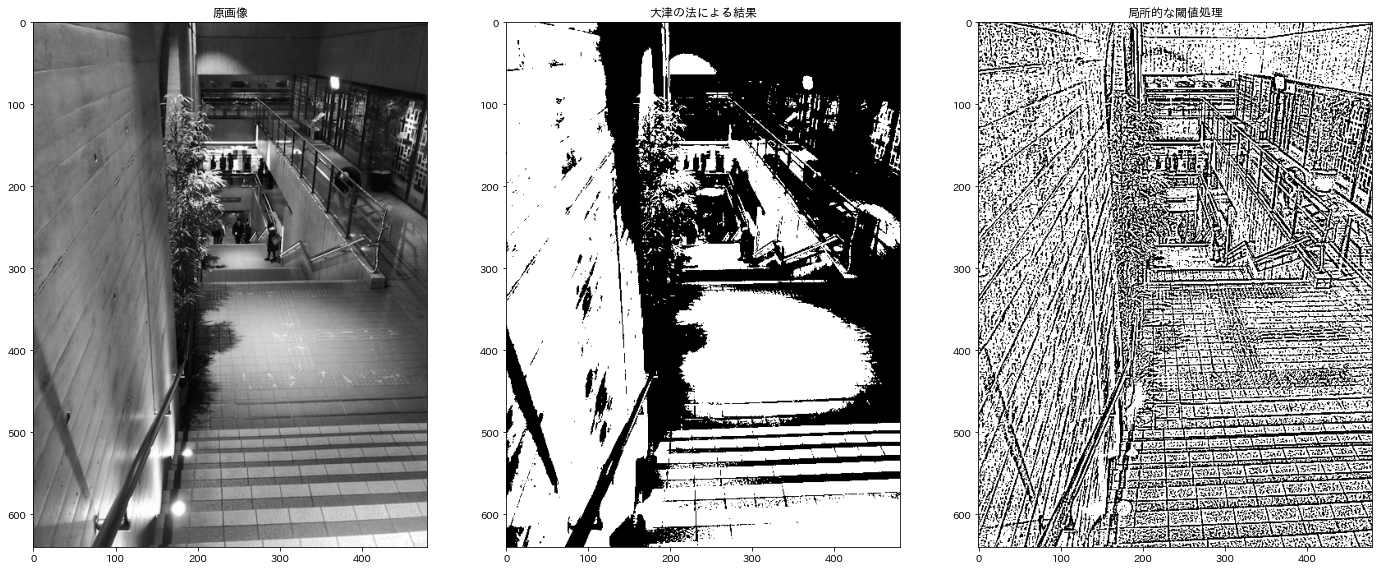

In [ ]:
gimg = cv2.imread('ueno.jpeg', cv2.IMREAD_GRAYSCALE)
ret, bimg1 = cv2.threshold(gimg, 0, 255, cv2.THRESH_OTSU)
bimg2 = cv2.adaptiveThreshold(gimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray')
plt.title('原画像')
plt.subplot(1,3,2)
plt.imshow(bimg1, cmap='gray')
plt.title('大津の法による結果')
plt.subplot(1,3,3)
plt.imshow(bimg2, cmap='gray')
plt.title('局所的な閾値処理');

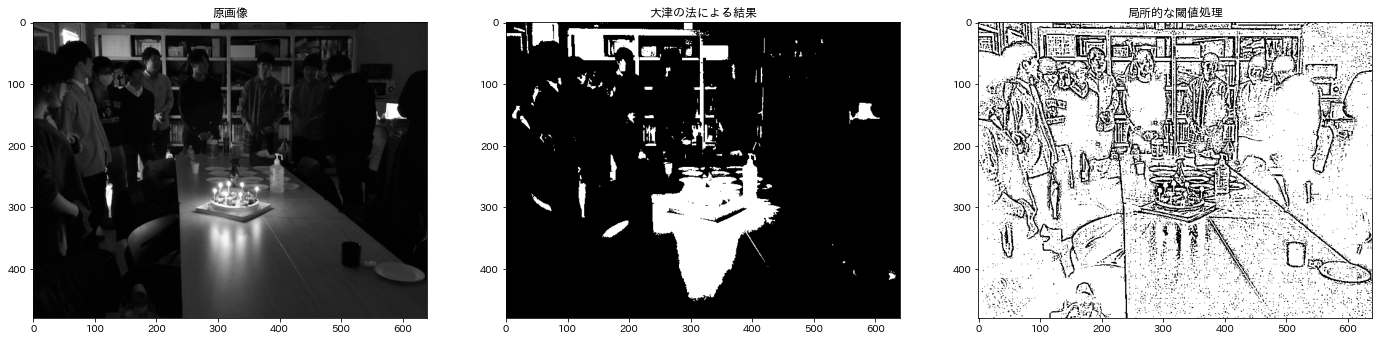

In [ ]:
gimg = cv2.imread('birthday.jpeg', cv2.IMREAD_GRAYSCALE)
ret, bimg1 = cv2.threshold(gimg, 0, 255, cv2.THRESH_OTSU)
bimg2 = cv2.adaptiveThreshold(gimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray')
plt.title('原画像')
plt.subplot(1,3,2)
plt.imshow(bimg1, cmap='gray')
plt.title('大津の法による結果')
plt.subplot(1,3,3)
plt.imshow(bimg2, cmap='gray')
plt.title('局所的な閾値処理');

# 膨張処理の応用　（破損した文字の修復）
https://www.cst.nihon-u.ac.jp/news/detail/20210618_870.html の文章をランダムに損壊したものを，CROSSのSEで膨張処理を施して修復する

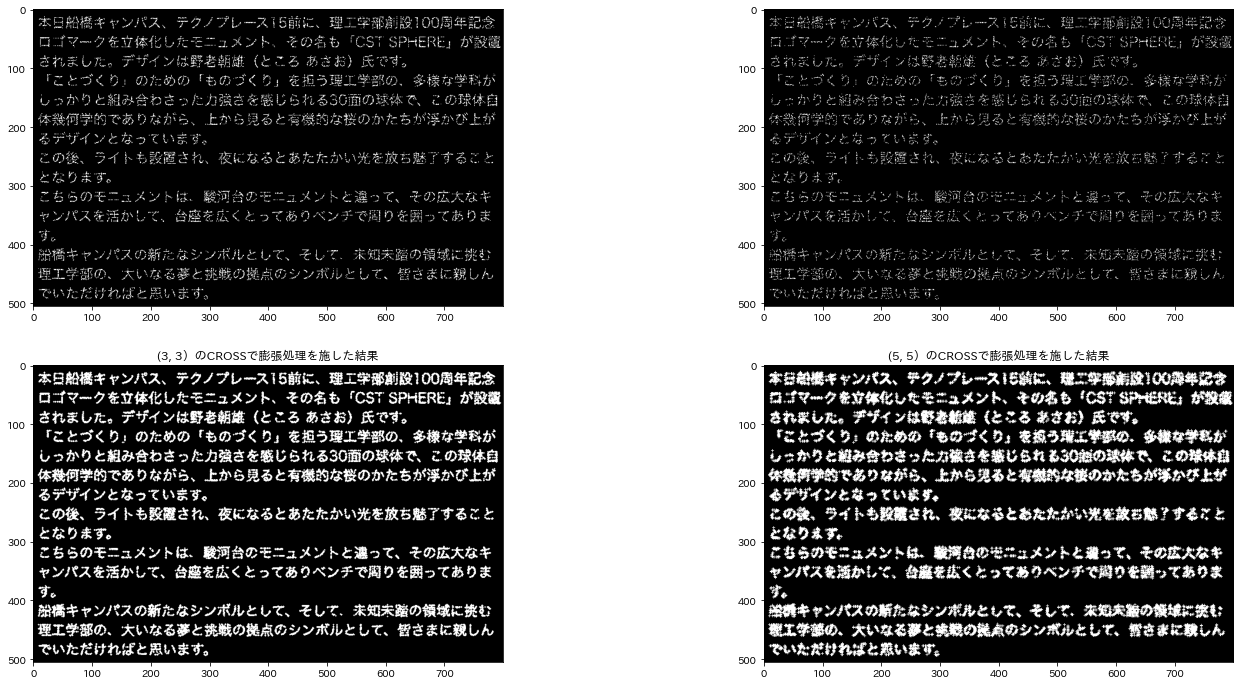

In [ ]:
gimg = cv2.imread('cst.png', cv2.IMREAD_GRAYSCALE)
ret, bimg = cv2.threshold(gimg, -1, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
mask = np.random.rand(gimg.shape[0], gimg.shape[1])
p = [0.7, 0.5]
size = [3, 5]
for i in range(2):
  bimg[mask>p[i]] = 0
  plt.subplot(2,2,i+1)
  plt.imshow(bimg, cmap='gray')
  SE = cv2.getStructuringElement(cv2.MORPH_CROSS, (size[i], size[i]))
  dst = cv2.dilate(bimg, kernel=SE)
  plt.subplot(2,2,3+i)
  plt.imshow(dst, cmap='gray')
  plt.title(f'({size[i]}, {size[i]}）のCROSSで膨張処理を施した結果');

# オープニング

オープニングは細かいノイズの除去や，くっついてしまった場所の分離に使う

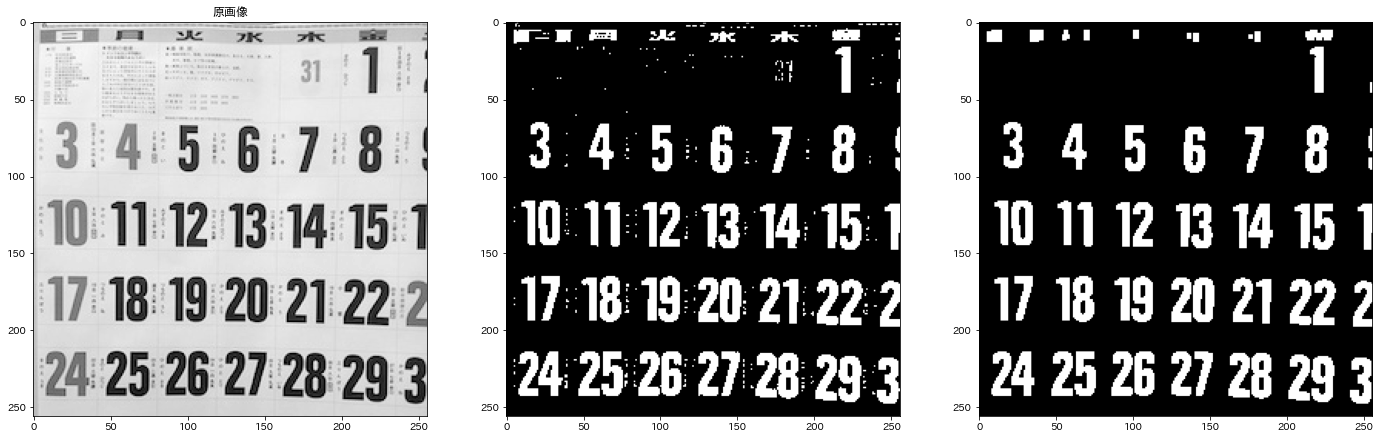

In [ ]:
gimg = cv2.imread('cal.jpeg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray')
plt.title('原画像')
bimg = np.zeros(gimg.shape, dtype=np.uint8)
bimg[gimg < 150] = 255
plt.subplot(1,3,2)
plt.imshow(bimg, cmap='gray')
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst = cv2.morphologyEx(bimg, cv2.MORPH_OPEN, kernel = SE)
plt.subplot(1,3,3)
plt.imshow(dst, cmap='gray')

# クロージング
クロージングは穴を塞ぐのに使う。

その他のMorphological Processingは https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html に説明が出ている

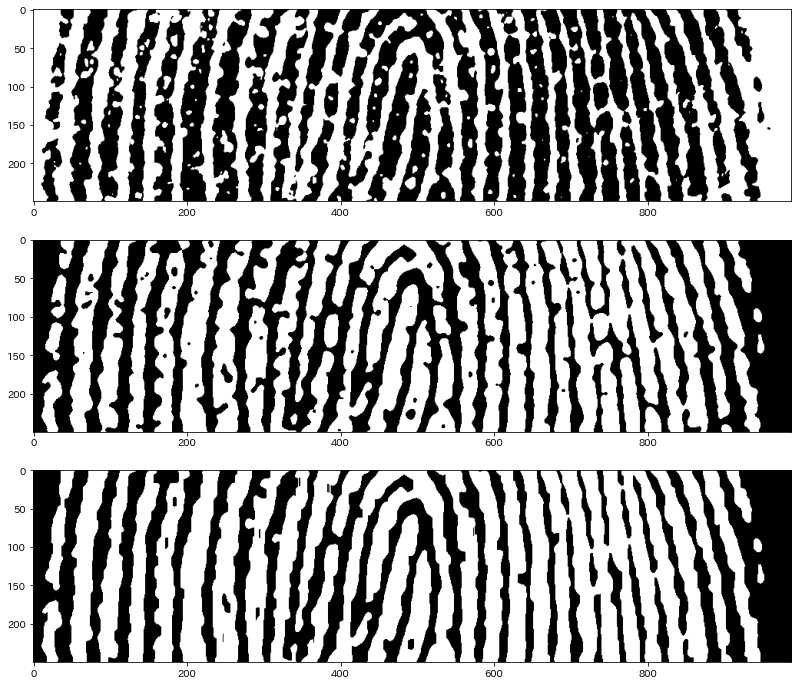

In [ ]:
gimg = cv2.imread('Fingerprint_(PSF).png', cv2.IMREAD_GRAYSCALE)
plt.subplot(3,1,1)
plt.imshow(gimg[500:750,:], cmap='gray')
gimg = cv2.blur(gimg, (7,7))
ret, bimg = cv2.threshold(gimg, -1, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
plt.subplot(3,1,2)
plt.imshow(bimg, cmap='gray')
plt.imshow(bimg[500:750,:], cmap='gray')
SEsq = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize=(1,3))
dst = cv2.morphologyEx(bimg, cv2.MORPH_CLOSE, kernel = SEsq, iterations=5)
# dst = cv2.dilate(bimg, kernel = SEsq,  iterations= 5)
# dst = cv2.erode(dst, kernel = SEsq, iterations = 5)
plt.subplot(3,1,3)
plt.imshow(dst[500:750,:], cmap='gray')

# ラベリング処理
Openingの続きから

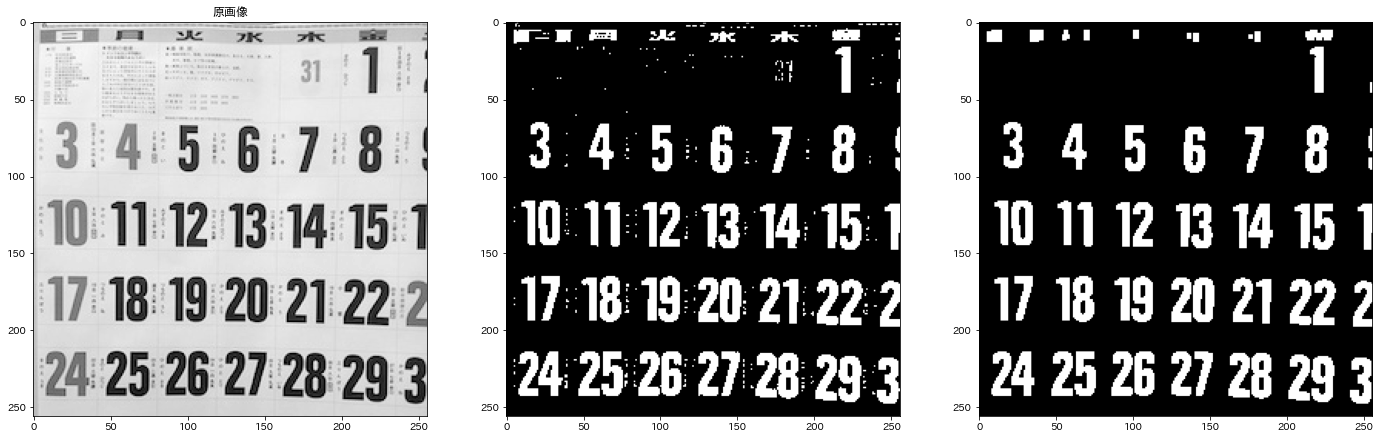

In [ ]:
# オープニング処理
gimg = cv2.imread('cal.jpeg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,3,1)
plt.imshow(gimg, cmap='gray')
plt.title('原画像')
bimg = np.zeros(gimg.shape, dtype=np.uint8)
bimg[gimg < 150] = 255
plt.subplot(1,3,2)
plt.imshow(bimg, cmap='gray')
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst = cv2.morphologyEx(bimg, cv2.MORPH_OPEN, kernel = SE)
plt.subplot(1,3,3)
plt.imshow(dst, cmap='gray')


## blob群からラベリング処理
背景もblob 0として処理されるので，原則全画素が何らかのラベルを振られる。

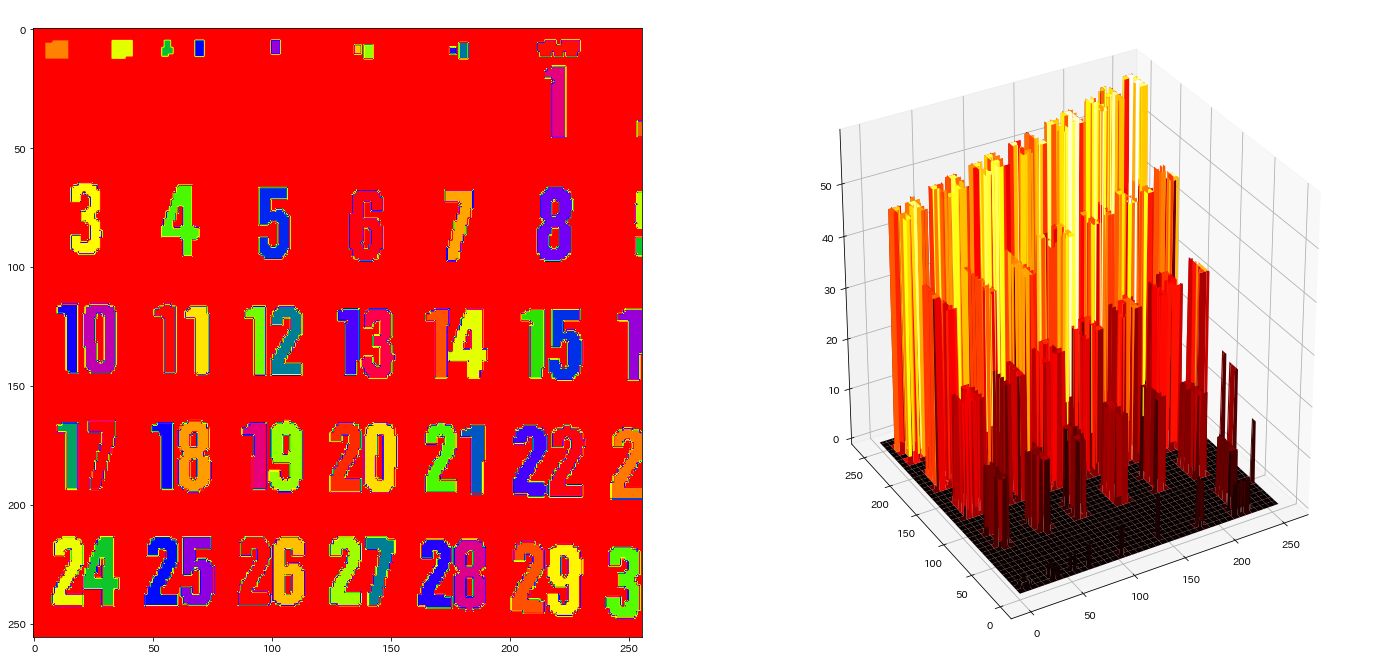

In [ ]:
from mpl_toolkits.mplot3d import axes3d
ret, labels = cv2.connectedComponents(dst, connectivity=8)
plt.subplot(1,2,1)
plt.imshow(labels, cmap='prism')
x = np.linspace(0, labels.shape[1], num=labels.shape[1])
y = np.linspace(0, labels.shape[0], num=labels.shape[0])
X, Y = np.meshgrid(x,y)
ax3d = plt.subplot(1,2,2, projection='3d')
ax3d.view_init(elev=30, azim=240)
ax3d.plot_surface(X, Y, labels, cmap='hot')


